In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

In [2]:
from pandas import read_excel
my_sheet = 'Sheet1' 
file_name = 'Missed_Appointments.xlsx'
df1 = read_excel(file_name, sheet_name = my_sheet)
df1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [40]:
df2 = read_excel('Missed_Appointments.xlsx', sheet_name = "Neighbourhood")
df2=df2.dropna(axis=1)

In [5]:
dataset2 = df1.copy().drop(columns = ['PatientId', 'AppointmentID'])
dataset2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
dataset2["ScheduledDay"] = [parser.parse(row_date) for row_date in dataset2["ScheduledDay"]]

In [7]:
dataset2["AppointmentDay"] = [parser.parse(row_date) for row_date in dataset2["AppointmentDay"]]
dataset2.dtypes

Gender                             object
ScheduledDay      datetime64[ns, tzutc()]
AppointmentDay    datetime64[ns, tzutc()]
Age                                 int64
Neighbourhood                      object
Scholarship                         int64
Hipertension                        int64
Diabetes                            int64
Alcoholism                          int64
Handcap                             int64
SMS_received                        int64
No-show                            object
dtype: object

In [8]:
dataset2=pd.merge(dataset2, df2, on=['Neighbourhood'])

In [9]:
dataset2["difference"] = (dataset2.AppointmentDay-dataset2.ScheduledDay)

In [41]:
dataset2.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Distance from Hospital,difference,Gndr,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,11,-1,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,11,-1,1,0
2,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,11,-1,0,0
3,F,69,JARDIM DA PENHA,0,1,0,0,0,1,No,11,22,0,0
4,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,11,-1,1,0


In [11]:
dataset2=dataset2.drop(columns=['ScheduledDay','AppointmentDay'])

In [42]:
dataset2.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Distance from Hospital,difference,Gndr,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,11,-1,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,11,-1,1,0
2,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,11,-1,0,0
3,F,69,JARDIM DA PENHA,0,1,0,0,0,1,No,11,22,0,0
4,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,11,-1,1,0


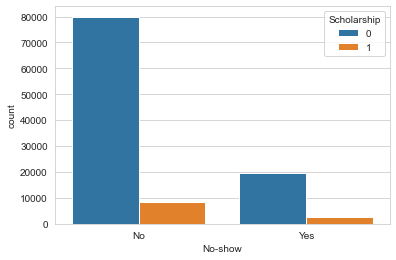

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='No-show',hue='Scholarship',data=dataset2)

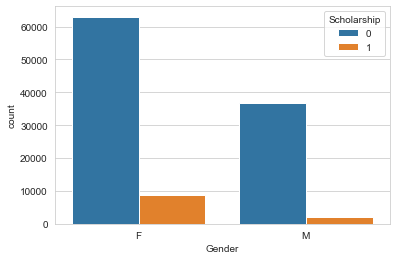

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Scholarship',data=dataset2)

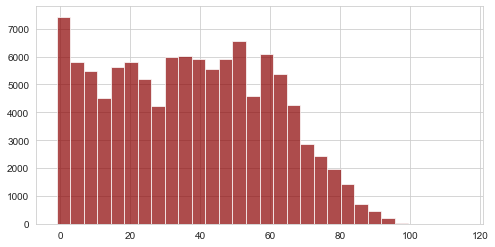

In [15]:
dataset2['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(8,4))
#Variation of age count

In [16]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender                    110527 non-null object
Age                       110527 non-null int64
Neighbourhood             110527 non-null object
Scholarship               110527 non-null int64
Hipertension              110527 non-null int64
Diabetes                  110527 non-null int64
Alcoholism                110527 non-null int64
Handcap                   110527 non-null int64
SMS_received              110527 non-null int64
No-show                   110527 non-null object
Distance from Hospital    110527 non-null int64
difference                110527 non-null timedelta64[ns]
dtypes: int64(8), object(3), timedelta64[ns](1)
memory usage: 16.0+ MB


In [17]:
dataset2['Gndr']=pd.get_dummies(dataset2['Gender'],drop_first=True)

In [18]:
dataset2['NoShow']=pd.get_dummies(dataset2['No-show'],drop_first=True)
dataset2.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Distance from Hospital,difference,Gndr,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,11,-1 days +05:21:52,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,11,-1 days +07:51:33,1,0
2,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,11,-1 days +07:52:37,0,0
3,F,69,JARDIM DA PENHA,0,1,0,0,0,1,No,11,22 days 05:59:31,0,0
4,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,11,-1 days +07:11:19,1,0


In [19]:
dataset2['difference'] = pd.to_numeric(dataset2['difference'].dt.days, downcast='integer')

In [20]:
dataset2.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Distance from Hospital,difference,Gndr,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,11,-1,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,11,-1,1,0
2,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,11,-1,0,0
3,F,69,JARDIM DA PENHA,0,1,0,0,0,1,No,11,22,0,0
4,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,11,-1,1,0


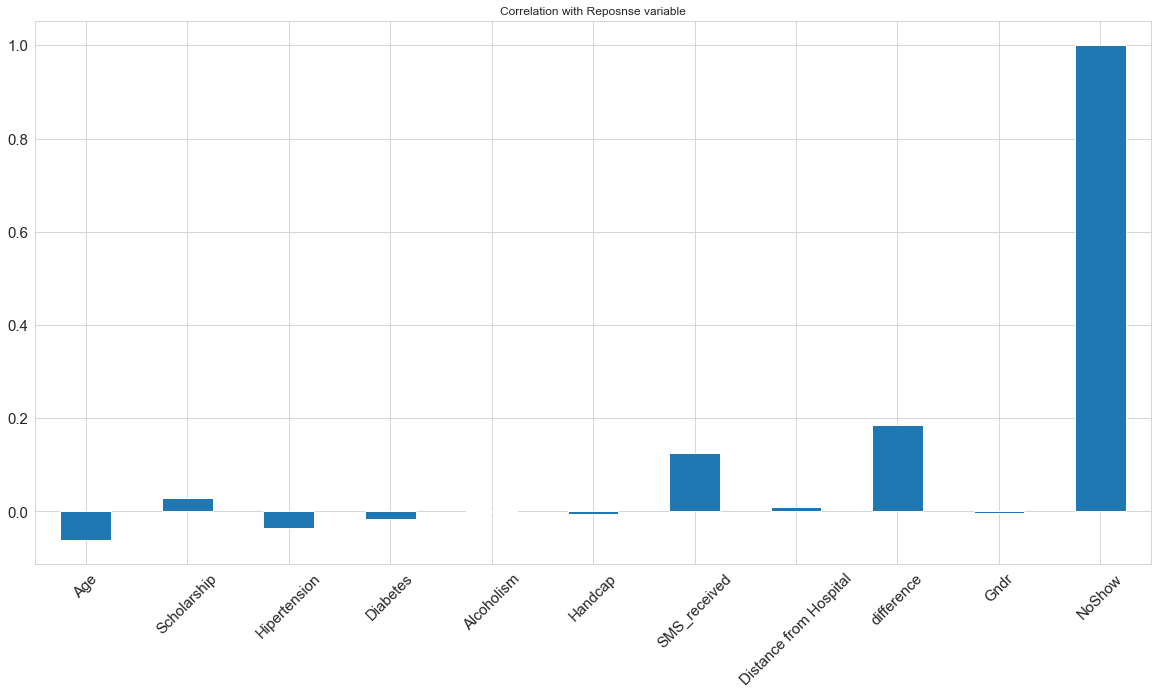

In [21]:
dataset2.corrwith(dataset2.NoShow).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

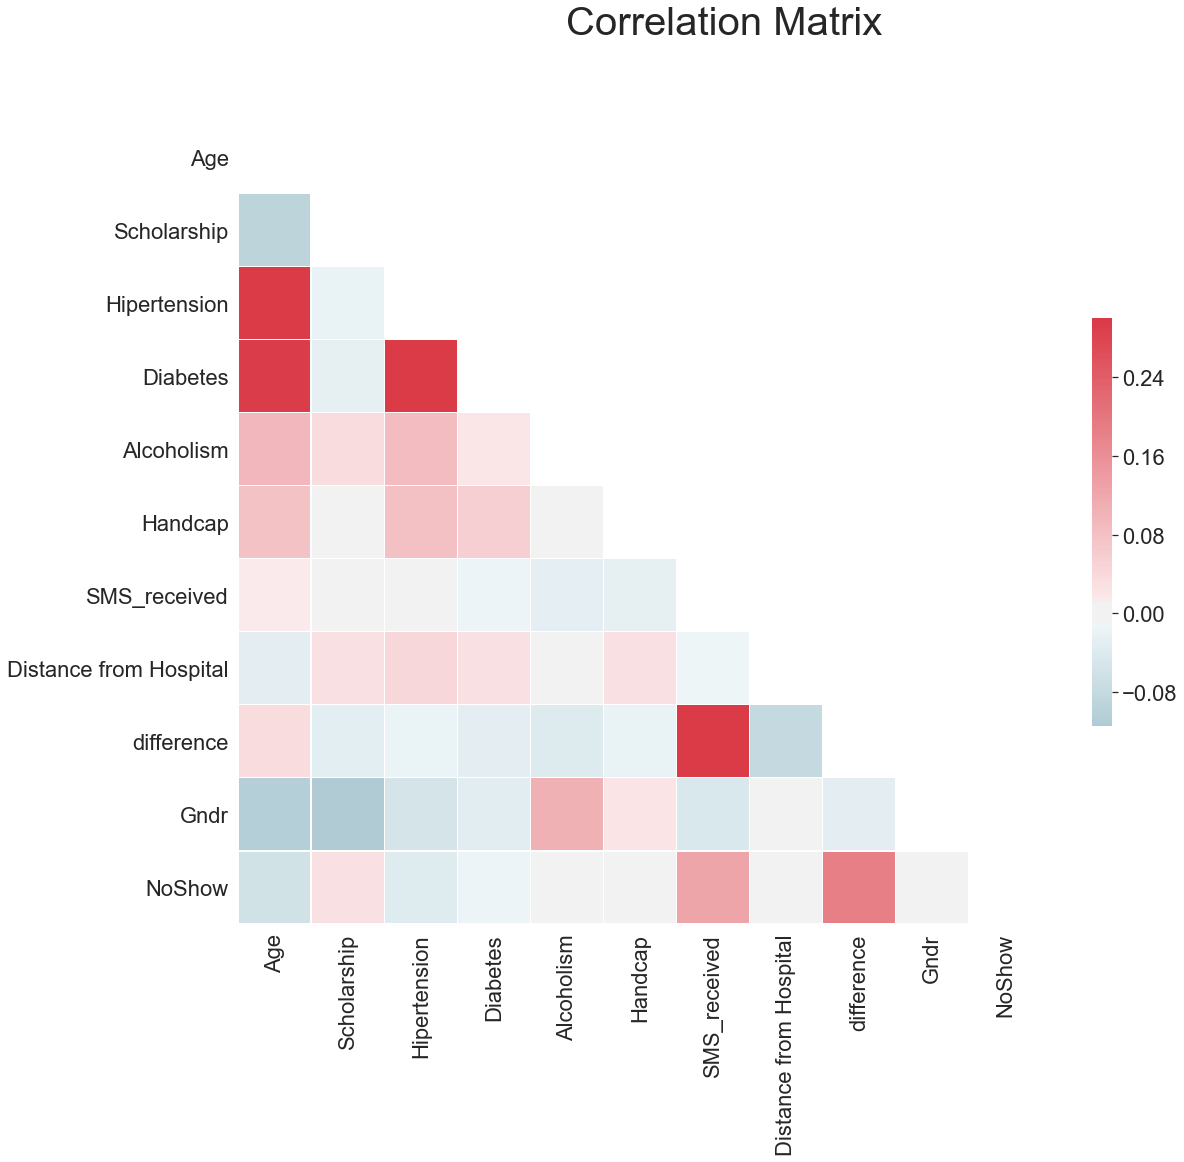

In [22]:
## Correlation Matrix
sns.set(style="white", font_scale=2)

# Computing the correlation matrix
corr = dataset2.corr()

# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generating a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
dataset3=dataset2.drop(['Gender','No-show','Neighbourhood'],axis=1)

In [24]:
dataset3.head() #Our data is ready. Based on all other factors in the table below we will try to predict if a person will 
# show up or not

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Distance from Hospital,difference,Gndr,NoShow
0,62,0,1,0,0,0,0,11,-1,0,0
1,56,0,0,0,0,0,0,11,-1,1,0
2,56,0,1,1,0,0,0,11,-1,0,0
3,69,0,1,0,0,0,1,11,22,0,0
4,56,0,0,0,0,0,0,11,-1,1,0


In [25]:
#Building a Logistic Regression model
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset3.drop('NoShow',axis=1), dataset3['NoShow'], test_size=0.30)

In [39]:
#Our Y is the variable we want to predict i.e. No-show, our X is everything else as input variable
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
#Evaluation Logistic Regression

In [37]:
import sklearn.metrics as metrics 
print("model F1-score in %:",metrics.f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions))*100)
print("model Accuracy-score in %:",metrics.accuracy_score(y_test,predictions)*100)
print("model Precision-score in %:",metrics.precision_score(y_test,predictions,average='weighted')*100)

model F1-score in %: 70.98655453966853
model Accuracy-score in %: 79.2786272203625
model Precision-score in %: 70.36241996096452


In [ ]:
#Applying GaussianNB Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = gnb.predict(X_test)

In [ ]:
#Evaluation GaussianNB Naive Bayes

In [38]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Gaussian Naive Bayes model F1-score in %:",metrics.f1_score(y_test, y_pred, average='weighted', 
                                                                   labels=np.unique(predictions))*100)
print("Gaussian Naive Bayes model Precision-score in %:",metrics.precision_score(y_test,y_pred,average='weighted')*100)

Gaussian Naive Bayes model accuracy(in %): 77.35154859917368
Gaussian Naive Bayes model F1-score in %: 72.76119824480196
Gaussian Naive Bayes model Precision-score in %: 71.19185630091354
